<a href="https://colab.research.google.com/github/Ramit28/22BDS0268/blob/main/22BDS0268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA PROJECT 1 SLOT C2
# FACULTY- DR.PRAKASH M
# 22BDS0268
# RAMIT KHETARPAL

In [76]:
# --------------------------------------
# BCSE331L EDA Project - 22BDS0268
# Phase I: Exploratory Data Analysis
# --------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/NaturalGas.csv"
df = pd.read_csv(url)

print("Dataset Dimensions:", df.shape)
print(df.head())

Dataset Dimensions: (138, 11)
   rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  


In [77]:
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames         int64
state           object
statecode        int64
year             int64
consumption      int64
price          float64
eprice         float64
oprice         float64
lprice         float64
heating          int64
income         float64
dtype: object


In [78]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  


In [79]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.528986  11193.235652  
std      2.577859   15.401018    2.124937  2451.998462   1906.726093  
min      1.980000    5.010000    0.680000   4

In [80]:
# 4. Data Cleaning & Handling
## 4.1 Check for Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

## 4.2 Check Missing Values
print("\nMissing Values:\n", df.isnull().sum())
# 4.3 Convert Short Forms into full Forms
df['state'] = df['state'].str.strip().str.upper()
state_full_names = {
    "NY": "New York",
    "UT": "Utah",
    "MI":"Michigan",
    "CA": "California",
    "FL": "Florida",
    "TX": "Texas"
}

df['state'] = df['state'].replace(state_full_names)

# Step 3: Check if it worked
print(df[df['state'].isin(["New York", "Utah", "California", "Florida", "Texas"])].head())
## 4.4 Convert data types if needed
df['year'] = df['year'].astype(int)
print(df)


Number of duplicate rows: 0

Missing Values:
 rownames       0
state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64
   rownames     state  statecode  year  consumption  price  eprice  oprice  \
0         1  New York         35  1967       313656   1.42    2.98    7.40   
1         2  New York         35  1968       319282   1.38    2.91    7.77   
2         3  New York         35  1969       331326   1.37    2.84    7.96   
3         4  New York         35  1970       346533   1.40    2.87    8.33   
4         5  New York         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  
     rownames       state  statecode  year  consumption  price  eprice  \
0           1    New Yor

In [81]:

selected_states = ["New York", "Utah", "California", "Florida", "Texas"]
df_filtered = df[df['state'].isin(selected_states)]
numeric_cols = df_filtered.select_dtypes(include=[np.number]).columns
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers
outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_filtered, col)
    outlier_summary[col] = outliers[[col, 'state', 'year']]

# Display results
for col, outliers in outlier_summary.items():
    print(f"\nOutliers in '{col}'")
    if outliers.empty:
        print("No outliers detected.")
    else:
        print(outliers)



Outliers in 'rownames'
No outliers detected.

Outliers in 'statecode'
No outliers detected.

Outliers in 'year'
No outliers detected.

Outliers in 'consumption'
No outliers detected.

Outliers in 'price'
No outliers detected.

Outliers in 'eprice'
No outliers detected.

Outliers in 'oprice'
No outliers detected.

Outliers in 'lprice'
No outliers detected.

Outliers in 'heating'
No outliers detected.

Outliers in 'income'
      income     state  year
22  16425.33  New York  1989


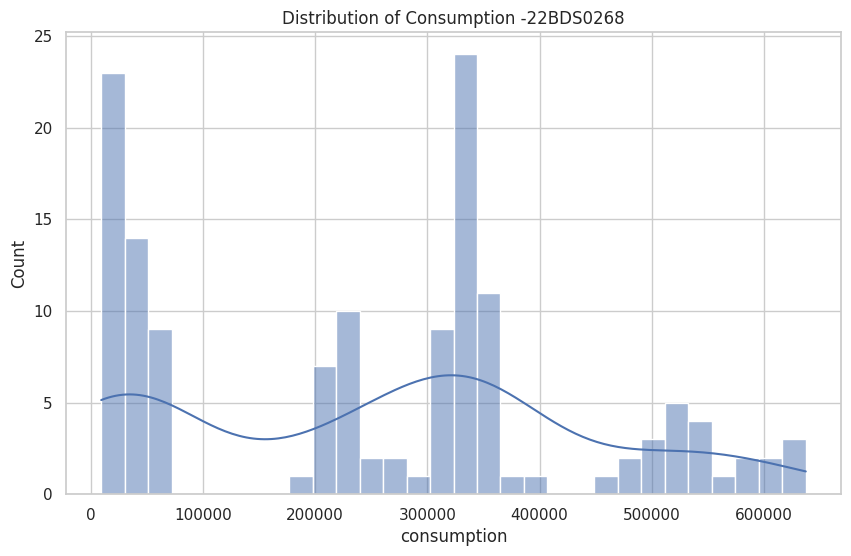

In [82]:
# 6. Univariate Analysis
## Histogram
sns.histplot(df['consumption'], kde=True, bins=30)
plt.title("Distribution of Consumption -22BDS0268")
plt.show()

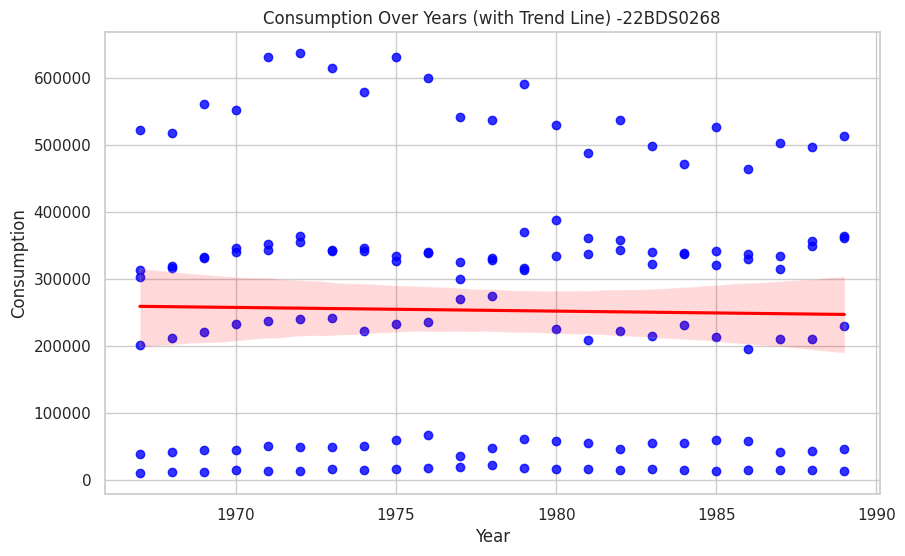

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='year', y='consumption', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Consumption Over Years (with Trend Line) -22BDS0268")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.show()


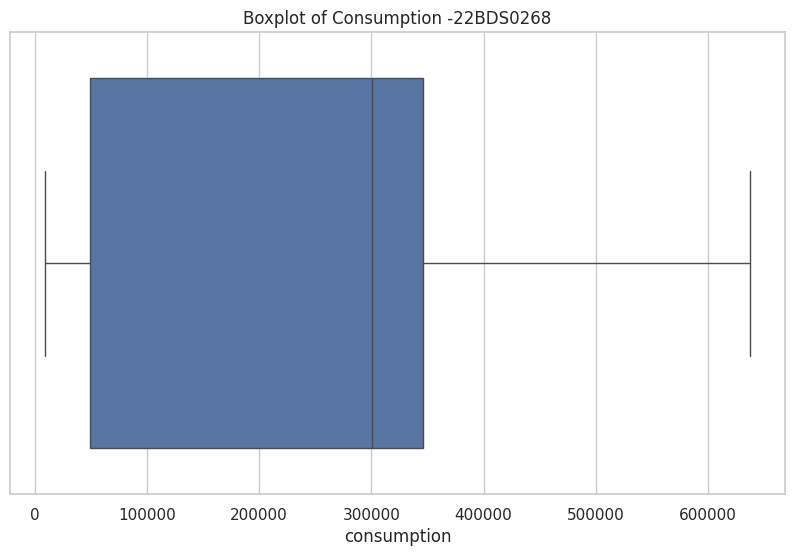

In [84]:
## Boxplot
sns.boxplot(x=df['consumption'])
plt.title("Boxplot of Consumption -22BDS0268")
plt.show()

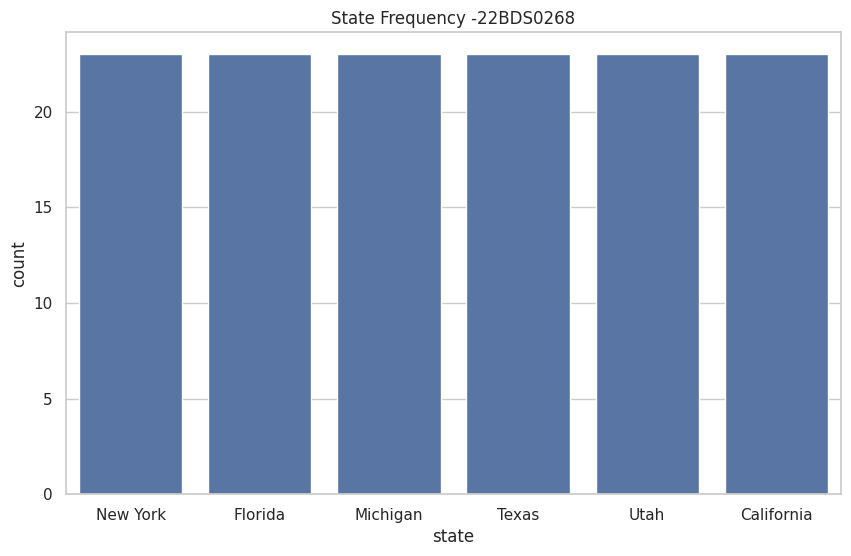

In [85]:
## Count Plot for State
sns.countplot(x='state', data=df)
plt.title("State Frequency -22BDS0268")
plt.show()

In [86]:
# Correlation Table
# 7. Bivariate Analysis
## Scatter Plot: Price vs Consumption
correlation = df.corr(numeric_only=True, method='pearson')
print("Correlation Table (Pearson method):\n")
print(correlation)


Correlation Table (Pearson method):

             rownames     statecode          year  consumption     price  \
rownames     1.000000 -7.387363e-02  1.665134e-01     0.269685 -0.125397   
statecode   -0.073874  1.000000e+00 -8.712084e-15    -0.354773 -0.112909   
year         0.166513 -8.712084e-15  1.000000e+00    -0.019843  0.885261   
consumption  0.269685 -3.547734e-01 -1.984306e-02     1.000000 -0.109541   
price       -0.125397 -1.129095e-01  8.852612e-01    -0.109541  1.000000   
eprice      -0.044162  1.768969e-02  9.057763e-01     0.045979  0.935463   
oprice       0.066212 -6.355616e-02  8.402169e-01     0.013371  0.856882   
lprice      -0.123010 -1.124573e-01  8.793796e-01    -0.110035  0.985123   
heating     -0.083223  4.617559e-01 -1.416930e-02     0.114430 -0.142188   
income      -0.058333 -4.240753e-01  6.424389e-01     0.558559  0.658469   

               eprice    oprice    lprice   heating    income  
rownames    -0.044162  0.066212 -0.123010 -0.083223 -0.058333 

In [87]:
# Compute correlation matrix
corr = df.corr(numeric_only=True, method='pearson')

# Find highest correlation pair (excluding self-correlation)
corr_unstacked = corr.unstack().sort_values(ascending=False)
highest_pair = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().idxmax()
highest_value = corr_unstacked[(corr_unstacked < 1)].drop_duplicates().max()

print(f"Highest correlation is between {highest_pair[0]} and {highest_pair[1]}: {highest_value:.2f}")


Highest correlation is between price and lprice: 0.99


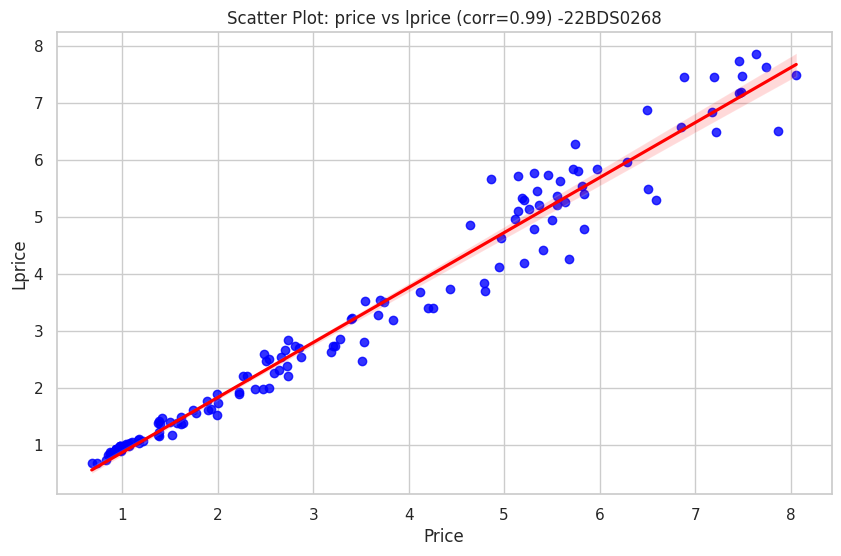

In [88]:
var1, var2 = highest_pair

sns.regplot(x=var1, y=var2, data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title(f"Scatter Plot: {var1} vs {var2} (corr={highest_value:.2f}) -22BDS0268")
plt.xlabel(var1.capitalize())
plt.ylabel(var2.capitalize())
plt.show()


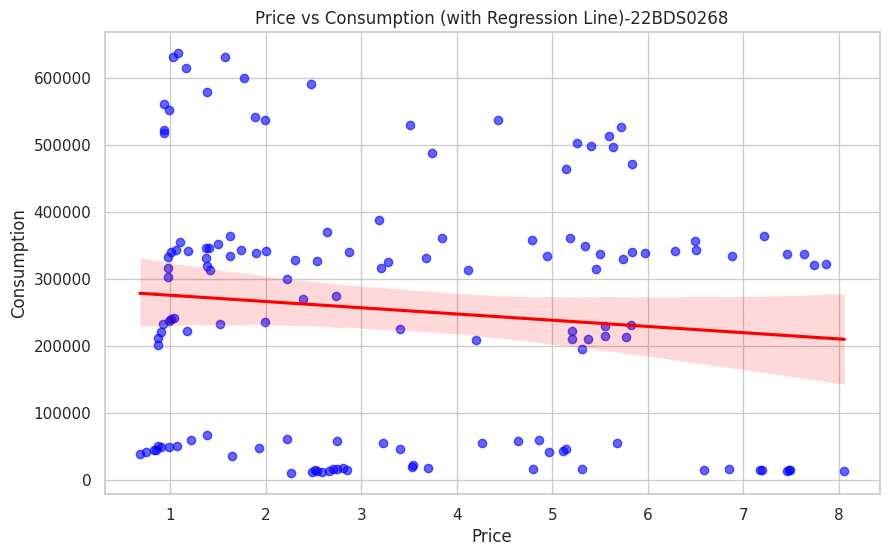

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter + regression line
sns.regplot(
    x='price',
    y='consumption',
    data=df,
    scatter_kws={'color': 'blue', 'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title("Price vs Consumption (with Regression Line)-22BDS0268")
plt.xlabel("Price")
plt.ylabel("Consumption")
plt.show()


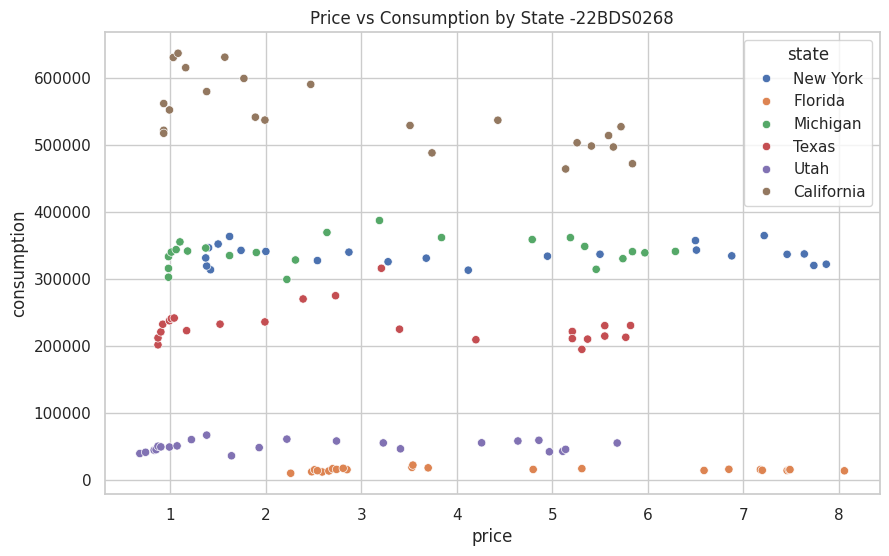

In [90]:

sns.scatterplot(x='price', y='consumption', hue='state', data=df)
plt.title("Price vs Consumption by State -22BDS0268")
plt.show()

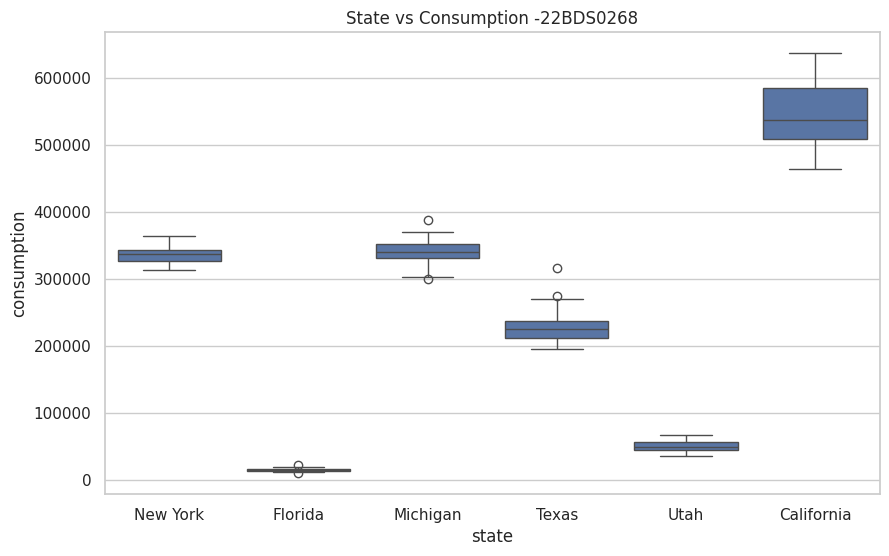

In [91]:
## Boxplot: State vs Consumption
sns.boxplot(x='state', y='consumption', data=df)
plt.title("State vs Consumption -22BDS0268")
plt.show()

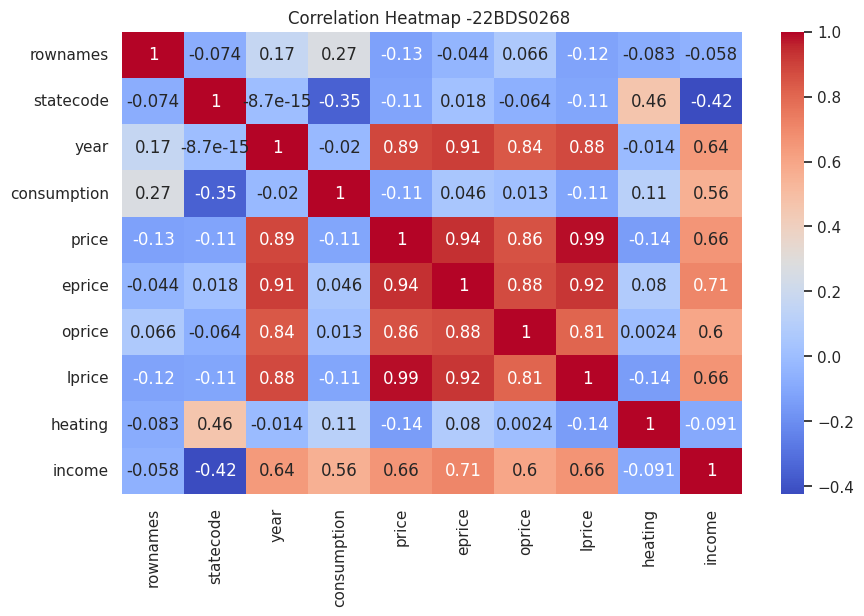

In [92]:
## Correlation Heatmap
corr = df.corr(numeric_only=True, method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap -22BDS0268 ")
plt.show()



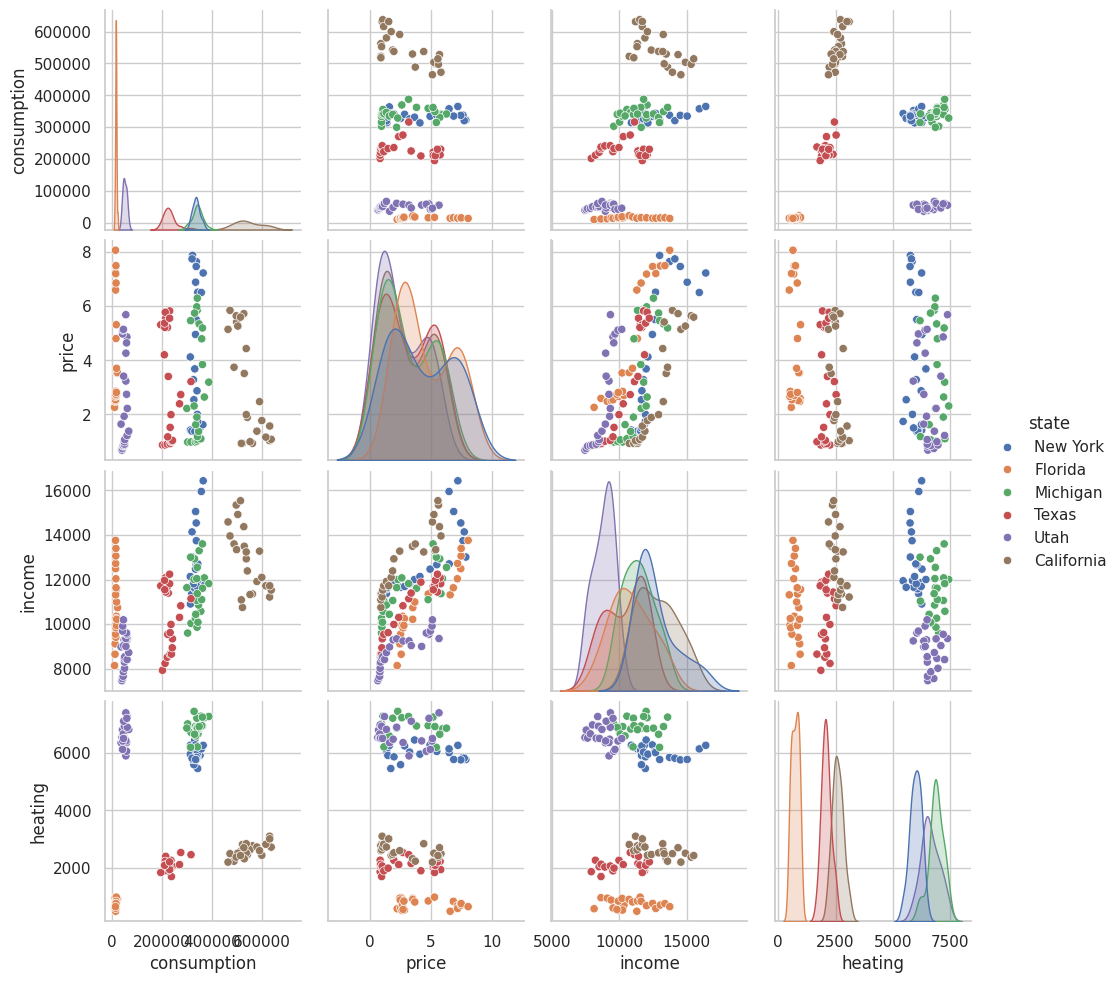

In [93]:
# 8. Multivariate Analysis
## Pair Plot
sns.pairplot(df, vars=['consumption', 'price', 'income', 'heating'], hue='state')
plt.show()

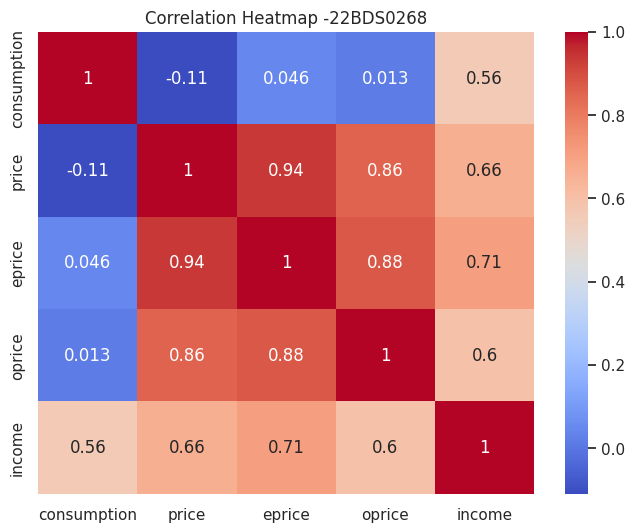

In [94]:
plt.figure(figsize=(8,6))
corr = df[['consumption', 'price', 'eprice', 'oprice', 'income']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap -22BDS0268")
plt.show()

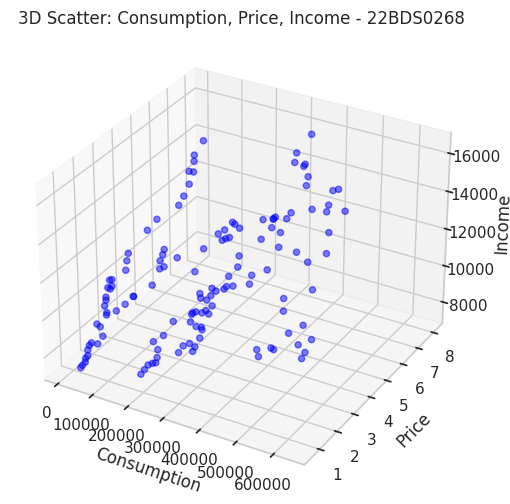

In [95]:
## 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['consumption'], df['price'], df['income'], c='blue', alpha=0.5)
ax.set_xlabel("Consumption")
ax.set_ylabel("Price")
ax.set_zlabel("Income")
plt.title("3D Scatter: Consumption, Price, Income - 22BDS0268")
plt.show()
# 9. Summary